<a href="https://colab.research.google.com/github/danielbau26/Aplicadas-Python/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Enfriamiento de una computadora**

#**Integrantes**
##**Daniel Bautista - A00411481**
##**Veronica Flor - A00411667**

###Curso: Aplicadas I - 03
###Fecha: 02/06/2025

##Resumen Ejecutivo
Este proyecto modela el proceso de enfriamiento de un componente de computador que alcanza su temperatura máxima (91 °C) y comienza a descender una vez que el equipo queda inactivo, sin programas en ejecución y desconectado de la corriente eléctrica. Se aplica la Ley de Enfriamiento de Newton para describir matemáticamente la disminución de la temperatura en función del tiempo, permitiendo calcular la tasa de variación, estimar con precisión el tiempo necesario para alcanzar una temperatura óptima de operación (como los 48 °C), y analizar el comportamiento térmico mediante el uso de derivadas.

##Introducción
Los componentes electrónicos de un computador generan calor durante su funcionamiento, y al alcanzar temperaturas elevadas (como 91 °C), corren el riesgo de sufrir daños o fallos críticos. Para evitarlo, el sistema debe enfriarse o apagarse automáticamente. Este comportamiento térmico puede modelarse matemáticamente utilizando herramientas del cálculo. En esta investigación, se aplican derivadas y funciones exponenciales para analizar el proceso de enfriamiento desde el punto de temperatura máxima hasta alcanzar un nivel seguro de operación, con el objetivo de garantizar la integridad del equipo y optimizar su desempeño.

##Marco teorico:
###Formula:

$\frac{dT}{dt} = T_a + (T_o - T_a)e^{-kt}$

$T_a$ = Temperatura ambiente

$T_o$ = Temperatura inicial de CPU

$e$ = constante de euler

$k$ = Constante de enfriamiento

$t$ = Tiempo transcurrido

###Tasa de cambio:
Derivando $T(t)$ respecto a $t$ se halla la rapidez con que la temperatura disminuye.

##Metodología:

$\frac{dT}{dt} = T_a + (T_o - T_a)e^{-kt}$

$T_a$ = $25^{o}C$

$T_o$ = $89^{o}C$

$e$ = 2,71828

$k$ = ???

$t$ = 2.5

##Procesador 1

| Tiempo (s) | Tiempo (min) | Temperatura (°C) |
|------------|---------------|------------------|
|     0      |     0.00      |       91.0       |
|    30      |     0.50      |       64.4       |
|    60      |     1.00      |       62.4       |
|    90      |     1.50      |       64.4       |
|   120      |     2.00      |       51.6       |
|   150      |     2.50      |       48.0       |

##Procesador 2

| Tiempo (s) | Tiempo (min) | Temperatura (°C) |
|------------|---------------|------------------|
|     0      |     0.00      |       86.0       |
|    30      |     0.50      |       72.0       |
|    60      |     1.00      |       64.0       |
|    90      |     1.50      |       60.0       |
|   120      |     2.00      |       52.0       |
|   150      |     2.50      |       48.0       |

###Hallamos la constante de enfriamiento

$48 = 25 + (91 - 25) e^{-2.5k}$

$48 = 25 + 66 e^{-2.5k}$

$23 = 66 e^{-2.5k}$

$\frac{23}{66} = e^{-2.5k}$

Aplicamos logaritmo natural:

$\ln\left(\frac{23}{66}\right) = -2.5k$

$k = -\frac{1}{2.5} \ln\left(\frac{23}{66}\right)$

$k \approx -\frac{1}{2.5} \cdot \ln(0.3485) \approx -\frac{-1.0538}{2.5}$
$ k \approx 0.4215 \ \text{min}^{-1}$

---

### Resultado final:

$\boxed{k \approx 0.4215 \ \text{min}^{-1}}$

##Resultados

##Procesador 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

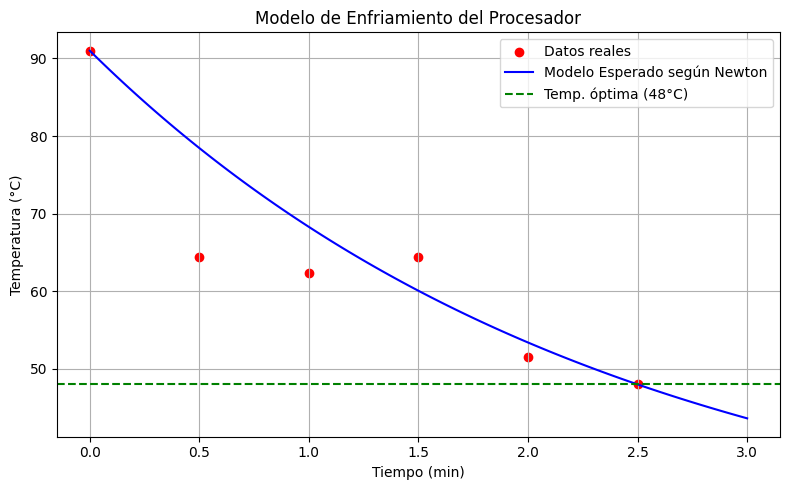

In [ ]:
tiempos_min = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
temperaturas = np.array([91.0, 64.4, 62.4, 64.4, 51.6, 48.0])

T_amb = 25 # Temperatura ambiente
T_0 = 91 # Temperatura inicial
k_aprox = 0.4215 # Constante k hallada manualmente

def modelo_newton(t, T_amb, T_0, k):
    return T_amb + (T_0 - T_amb) * np.exp(-k * t)

t_cont = np.linspace(0, 3, 100)
T_modelada = modelo_newton(t_cont, T_amb, T_0, k_aprox)

plt.figure(figsize=(8, 5))
plt.scatter(tiempos_min, temperaturas, color='red', label='Datos reales')
plt.plot(t_cont, T_modelada, color='blue', label='Modelo Esperado según Newton')
plt.axhline(y=48, color='green', linestyle='--', label='Temp. óptima (48°C)')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Modelo de Enfriamiento del Procesador 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

| Intervalo (min) | Tasa de cambio (°C/min) |
|------------------|---------------------------|
| 0.0 – 0.5        | -53.2                    |
| 0.5 – 1.0        | -4.0                     |
| 1.0 – 1.5        | +4.0                     |
| 1.5 – 2.0        | -25.6                    |
| 2.0 – 2.5        | -7.2                     |

##Procesador 2

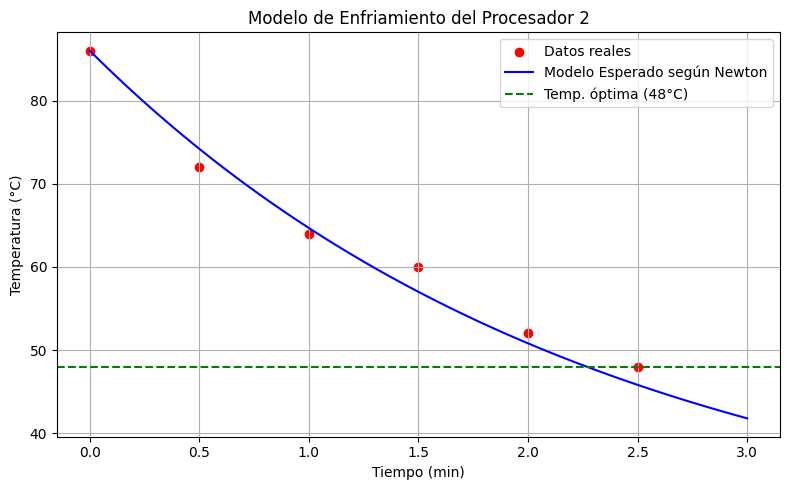

In [6]:
tiempos_min = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
temperaturas = np.array([86.0, 72.0, 64.0, 60.0, 52.0, 48.0])

T_amb = 25  # Temperatura ambiente
T_0 = 86    # Temperatura inicial basada en el nuevo dato
k_aprox = 0.43  # Constante de enfriamiento

def modelo_newton(t, T_amb, T_0, k):
    return T_amb + (T_0 - T_amb) * np.exp(-k * t)

t_cont = np.linspace(0, 3, 100)
T_modelada = modelo_newton(t_cont, T_amb, T_0, k_aprox)

plt.figure(figsize=(8, 5))
plt.scatter(tiempos_min, temperaturas, color='red', label='Datos reales')
plt.plot(t_cont, T_modelada, color='blue', label='Modelo Esperado según Newton')
plt.axhline(y=48, color='green', linestyle='--', label='Temp. óptima (48°C)')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Modelo de Enfriamiento del Procesador 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

| Intervalo (min) | Tasa de cambio (°C/min) |
|------------------|---------------------------|
| 0.0 – 0.5        | -28.0                    |
| 0.5 – 1.0        | -16.0                    |
| 1.0 – 1.5        | -8.0                     |
| 1.5 – 2.0        | -16.0                    |
| 2.0 – 2.5        | -8.0                     |

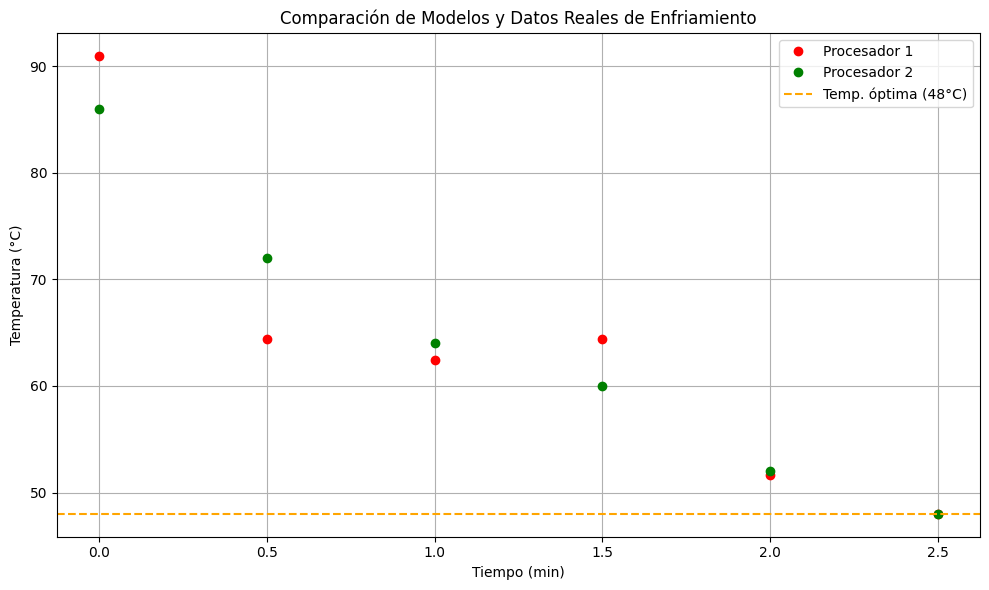

In [15]:
tiempos_min_1 = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
temperaturas_1 = np.array([91.0, 64.4, 62.4, 64.4, 51.6, 48.0])
T_amb_1 = 25
T_0_1 = 91
k_1 = 0.4215

tiempos_min_2 = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
temperaturas_2 = np.array([86.0, 72.0, 64.0, 60.0, 52.0, 48.0])
T_amb_2 = 25
T_0_2 = 86
k_2 = 0.43

t_cont = np.linspace(0, 3, 100)
T_modelada_1 = modelo_newton(t_cont, T_amb_1, T_0_1, k_1)
T_modelada_2 = modelo_newton(t_cont, T_amb_2, T_0_2, k_2)

# ---------- Gráfica combinada ----------
plt.figure(figsize=(10, 6))

# Datos reales 1
plt.plot(tiempos_min_1, temperaturas_1, 'o', color='red', label='Procesador 1')

# Datos reales 2
plt.plot(tiempos_min_2, temperaturas_2, 'o', color='green', label='Procesador 2')

# Línea de temperatura óptima
plt.axhline(y=48, color='orange', linestyle='--', linewidth=1.5, label='Temp. óptima (48°C)')

# Personalización
plt.title('Comparación de Modelos y Datos Reales de Enfriamiento')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Conclusiones

- Las matemáticas aplicadas permiten predecir con precisión el comportamiento térmico.

- La derivada ayuda a entender la velocidad de enfriamiento.

- Se logro usar este modelo para optimizar ventilación en tiempo real.

- Limitación: no considera variación de flujo de aire o carga de trabajo.

##Bibliografía

https://hardzone.es/tutoriales/rendimiento/temperatura-optima-procesador-intel/
http://www.sc.ehu.es/sbweb/fisica/estadistica/otros/enfriamiento/enfriamiento.htm